# Wave / Sound Utilities

In [1]:
import os
import warnings
import pandas as pd

from IPython.display import Audio
from scipy.io import wavfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
def get_from_to_offset(f, d, l, sample_rate):
    f = max(0, f)
    d = l if d < 0 else d 
    t = f + d
    return (int(f*sample_rate), int(t*sample_rate))

In [3]:
data_dir = '/Volumes/MyMedias/Kaggle/Freesound/'
os.listdir(data_dir)

['sample_submission.csv',
 'test',
 'test.zip',
 'train_curated',
 'train_curated.csv',
 'train_curated.zip',
 'train_noisy',
 'train_noisy.csv',
 'train_noisy.zip']

In [36]:
train = pd.read_csv(data_dir + "train_curated.csv")
test = pd.read_csv(data_dir + "sample_submission.csv")
train_noise = pd.read_csv(data_dir + "train_noisy.csv")

In [5]:
train.sample(10)

,fname,labels
3752,c10a5857.wav,Chirp_and_tweet
1454,4bd94899.wav,Burping_and_eructation
2275,75d85c4c.wav,"Car_passing_by,Traffic_noise_and_roadway_noise"
1,0019ef41.wav,Raindrop
4542,eaf3751d.wav,Female_speech_and_woman_speaking
3985,cd0205e3.wav,Gurgling
4868,fb4a6a7a.wav,Finger_snapping
3800,c34affca.wav,"Crowd,Cheering"
3308,ab995ca4.wav,Waves_and_surf
3439,b21f302b.wav,"Meow,Purr"


In [6]:
test.sample(10)

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
1068,3f19e53c.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,3c1b9399.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594,23d35eea.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,351a8abe.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,218c8907.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1670b964.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,3ebaff6d.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,14d22f20.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
731,2d09c7ca.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832,32663622.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_noise.sample(20)

,fname,labels
19046,f5f1e2da.wav,Crackle
1143,0eb55314.wav,Burping_and_eructation
11363,926f2034.wav,Accelerating_and_revving_and_vroom
15344,c5c6ddcc.wav,Church_bell
14257,b7469f61.wav,"Burping_and_eructation,Dishes_and_pots_and_pan..."
10668,89b39fe0.wav,Tick-tock
12090,9b97737f.wav,Knock
14336,b8441a7e.wav,Mechanical_fan
14935,c02a8ab7.wav,Raindrop
15911,cdba7d72.wav,Skateboard


In [43]:
print("Number of train examples=", train.shape[0], "  Number of classes=", len(set(train.labels)))
print("Number of train_noise examples=", train_noise.shape[0], "  Number of classes=", len(set(train_noise.labels)))
print("Number of test examples=", test.shape[0], "  Number of classes=", len(set(test.columns[1:])))

Number of train examples= 4970   Number of classes= 213
Number of train_noise examples= 16566   Number of classes= 80
Number of test examples= 1120   Number of classes= 80


In [52]:
test_column_in_train_noise = test.columns.isin(train_noise.labels)
print((test_column_in_train_noise))

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [53]:
test_column_in_train = test.columns.isin(train.labels)
print((test_column_in_train))

[False  True  True  True False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True]


In [55]:
train_and_noise_labels = train_noise.labels.isin(train.labels)
print(len(train_and_noise_labels))

16566


In [8]:
bm = train.labels.isin(test.columns[1:])
type(bm)

pandas.core.series.Series

In [9]:
train = train[train.labels.isin(test.columns[1:])]
print(len(train))

4269


In [42]:
train_noise = train_noise[train_noise.labels.isin(test.columns[1:])]
print(len(train_noise))

16566


In [10]:
category_group = train.groupby(['labels']).count()
category_group.columns = ['counts']
print(len(category_group))

74


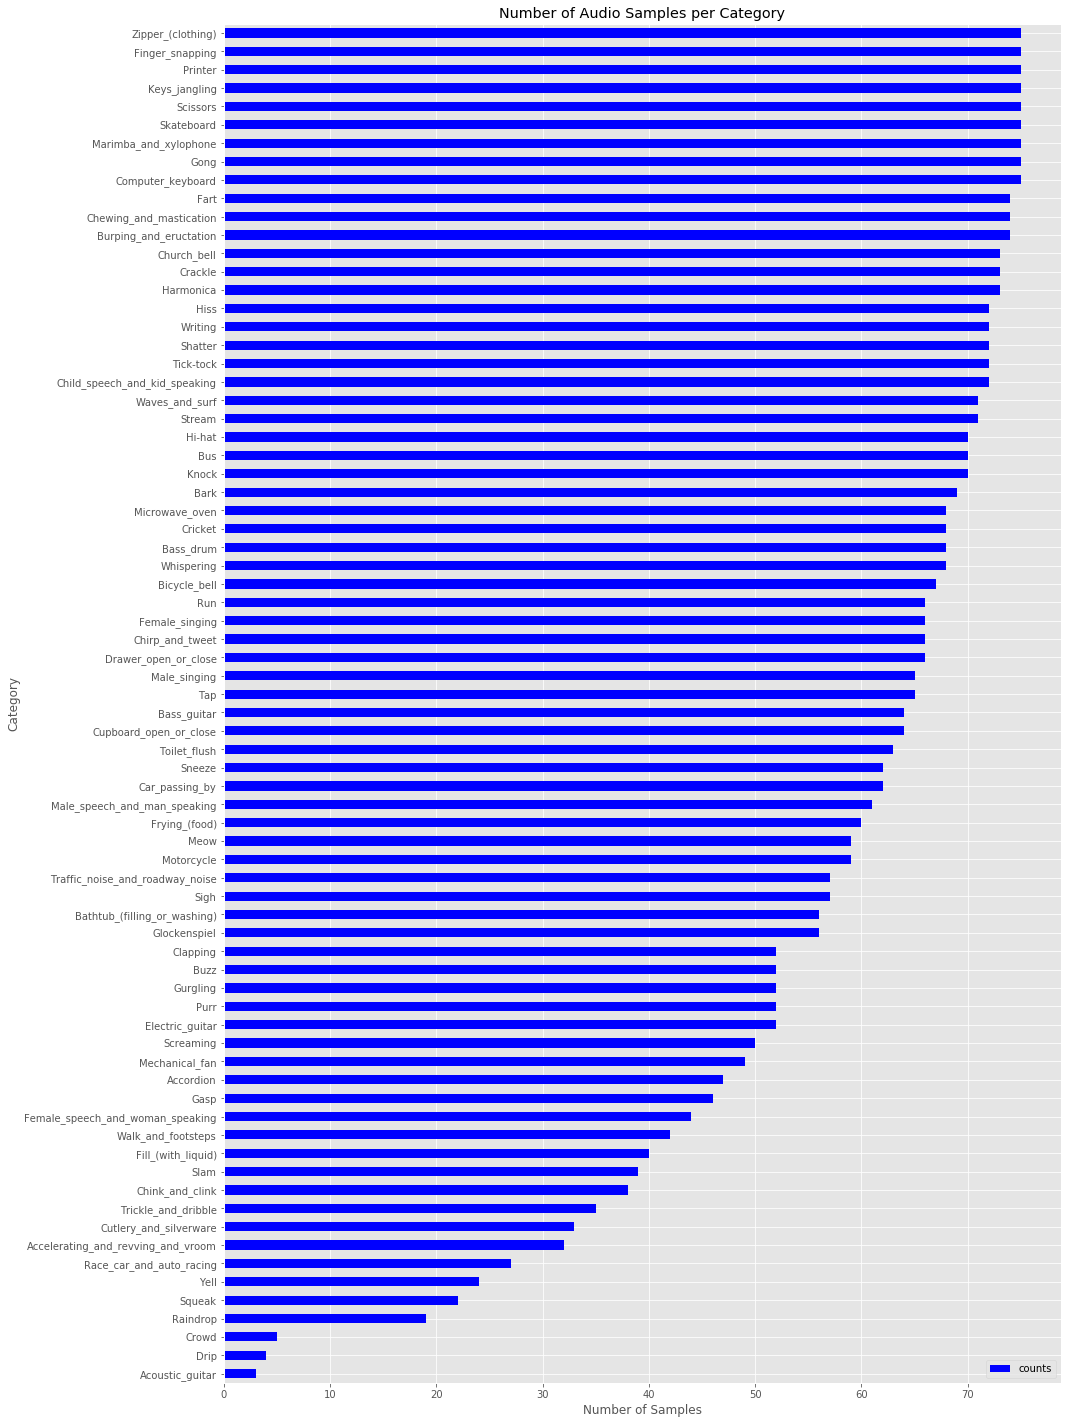

In [11]:
plot = category_group.sort_values(ascending=True, by='counts').plot(
    kind='barh', 
    title="Number of Audio Samples per Category", 
    color='blue', 
    figsize=(15,25))
plot.set_ylabel("Category")
plot.set_xlabel("Number of Samples");

In [12]:
print(len(train.labels.value_counts()))
print('Minimum samples per category = ', min(train.labels.value_counts()))
print('Maximum samples per category = ', max(train.labels.value_counts()))

74
Minimum samples per category =  3
Maximum samples per category =  75


In [95]:

# read the wave file
sample_rate, samples = wavfile.read(data_dir + 'train_noisy/c02a8ab7.wav')

(start, end) = get_from_to_offset (-1, 0.001, len(samples)/sample_rate, sample_rate)
print (start,end)
data  = samples[start:end]
Audio(data, rate=sample_rate)

0 44


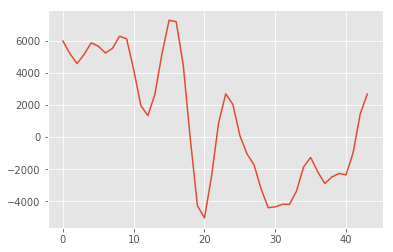

In [96]:
plt.plot(data)
plt.show()

In [61]:
svd_width = int(sample_rate / 10)
padding = svd_width - (len(data) % svd_width)
data = np.pad(data, (0, padding), 'constant', constant_values=(0, 0))
datamat = data
print(len(datamat))

665910


In [62]:
datamat.shape = (-1,svd_width)
datamat.shape
print(data.shape)

(151, 4410)


In [63]:
U, D, V = np.linalg.svd(datamat)

In [64]:
print("U{}".format(U.shape))
print("D{}".format(D.shape))
print("V{}".format(V.shape))

U(151, 151)
D(151,)
V(4410, 4410)


In [79]:
num_vecs = 151
reconstimg = np.matrix(U[:, :num_vecs]) * np.diag(D[:num_vecs]) * np.matrix(V[:num_vecs, :])
d = datamat - reconstimg
print("reconstimg{}".format(reconstimg.shape))

reconstimg(151, 4410)


In [80]:
import array
data_recon = np.asarray(reconstimg).reshape(-1)
d_flat = np.asarray(d).reshape(-1)
d_flat.shape


(665910,)

In [81]:
Audio(data_recon, rate=sample_rate)

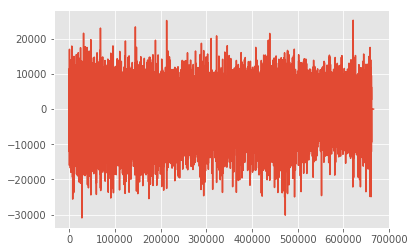

In [82]:
plt.plot(data_recon)
plt.show()

In [69]:
Audio(d_flat, rate=sample_rate)

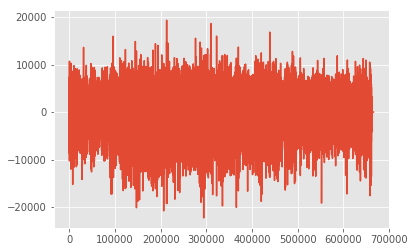

In [70]:


plt.plot(d_flat)
plt.show()

In [34]:
labelsx = test.iloc[3,:] == 1
print(labelsx)
print(test.columns[labelsx])


fname                                 False
Accelerating_and_revving_and_vroom    False
Accordion                             False
Acoustic_guitar                       False
Applause                              False
Bark                                  False
Bass_drum                             False
Bass_guitar                           False
Bathtub_(filling_or_washing)          False
Bicycle_bell                          False
Burping_and_eructation                False
Bus                                   False
Buzz                                  False
Car_passing_by                        False
Cheering                              False
Chewing_and_mastication               False
Child_speech_and_kid_speaking         False
Chink_and_clink                       False
Chirp_and_tweet                       False
Church_bell                           False
Clapping                              False
Computer_keyboard                     False
Crackle                         